<a href="https://colab.research.google.com/github/HamzaWajid1/Whatsapp_chat_finetuned_chatbot/blob/main/Whatsapp_chat_analysis_with_chatbot_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install whatstk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 84.2 MB/s eta 0:00:00
  Created wheel for whatstk: filename=whatstk-0.6.2-py3-none-any.whl size=60396 sha256=e725821055d134eb17a1c6ae2d8abc9c4d2c928b0e9d5de8b2695b401a986c55
  Stored in directory: /root/.cache/pip/wheels/62/1e/f2/69386e57a388ed2a9f8e19db1cc95ccd735dd6a521dd686b00
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=9c27f1deb23da807cbd5c1cd3d392033c5e30c2b5f91cbc8387e844307e9aebd
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built whatstk emoji
  Attempting uninstall: plotly
    Found exist

In [69]:
%pip install heatmap

  Using cached heatmap-2.2.1.zip (25 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [71]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import datetime as dt
from matplotlib.ticker import MaxNLocator
import regex
import emoji
from seaborn import *
#import heatmap
#from heatmap import heatmap
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *
from plotly import express as px

In [1]:
from whatstk import WhatsAppChat
from whatstk.data import whatsapp_urls
chat = WhatsAppChat.from_source(filepath='/content/chat_with_affan.txt')


In [34]:
df=chat.df

In [35]:
df

,date,username,message,Dates,Time
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778 Saadullah,2021-09-24,11:31:00
3,2021-09-24 11:32:00,Hamza Wajid,"Thanks yaar 9/26/21, 2:29 PM - Affan Ali Giki:...",2021-09-24,11:32:00
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00
...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,"Nhi to na lagao 11/15/23, 12:46 PM - Hamza Waj...",2023-11-15,08:16:00
439,2023-11-27 11:18:00,Affan Ali Giki,"Missed voice call 12/2/23, 7:21 PM - Hamza Waj...",2023-11-27,11:18:00
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00


In [25]:
print(f"start date:{chat.start_date}\nend date:{chat.end_date}")

start date:2021-09-22 08:50:00
end date:2023-12-05 11:09:00


In [26]:
chat.users

['Affan Ali Giki', 'Hamza Wajid']

In [27]:
import pandas as pd

In [28]:
df['Dates'] = pd.to_datetime(df['date']).dt.date
df['Time'] = pd.to_datetime(df['date']).dt.time


In [29]:
#df=df.drop('date',axis=1)

In [36]:
df

,date,username,message,Dates,Time
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778 Saadullah,2021-09-24,11:31:00
3,2021-09-24 11:32:00,Hamza Wajid,"Thanks yaar 9/26/21, 2:29 PM - Affan Ali Giki:...",2021-09-24,11:32:00
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00
...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,"Nhi to na lagao 11/15/23, 12:46 PM - Hamza Waj...",2023-11-15,08:16:00
439,2023-11-27 11:18:00,Affan Ali Giki,"Missed voice call 12/2/23, 7:21 PM - Hamza Waj...",2023-11-27,11:18:00
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00


In [31]:
df.shape

(443, 4)

In [32]:
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}

In [37]:
df['day']=df['date'].dt.weekday.map(weeks)

In [38]:
df

,date,username,message,Dates,Time,day
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00,Wednesday
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778 Saadullah,2021-09-24,11:31:00,Friday
3,2021-09-24 11:32:00,Hamza Wajid,"Thanks yaar 9/26/21, 2:29 PM - Affan Ali Giki:...",2021-09-24,11:32:00,Friday
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday
...,...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,"Nhi to na lagao 11/15/23, 12:46 PM - Hamza Waj...",2023-11-15,08:16:00,Wednesday
439,2023-11-27 11:18:00,Affan Ali Giki,"Missed voice call 12/2/23, 7:21 PM - Hamza Waj...",2023-11-27,11:18:00,Monday
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00,Tuesday
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00,Tuesday


In [39]:
df['letters']=df['message'].apply(lambda s: len(s))
df

,date,username,message,Dates,Time,day,letters
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00,Wednesday,29
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday,17
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778 Saadullah,2021-09-24,11:31:00,Friday,20
3,2021-09-24 11:32:00,Hamza Wajid,"Thanks yaar 9/26/21, 2:29 PM - Affan Ali Giki:...",2021-09-24,11:32:00,Friday,1584
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday,17
...,...,...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,"Nhi to na lagao 11/15/23, 12:46 PM - Hamza Waj...",2023-11-15,08:16:00,Wednesday,435
439,2023-11-27 11:18:00,Affan Ali Giki,"Missed voice call 12/2/23, 7:21 PM - Hamza Waj...",2023-11-27,11:18:00,Monday,303
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00,Tuesday,15
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00,Tuesday,15


In [95]:
df['Cleaned_Message'] = df['message'].apply(lambda x: re.sub(r'^.*?-\s', '', x))
df['Cleaned_Message'] = df['message'].apply(lambda x: x.split('\n', 1)[0])

<ipython-input-95-8b3a6f82d501>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-95-8b3a6f82d501>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
df[55:75]

,date,username,message,Dates,Time,day,letters,words,Url_Count,Media_Count,Cleaned_Message
58,2021-12-20 10:26:00,Affan Ali Giki,Ph ka sir kuch kehta to nahi wese,2021-12-20,10:26:00,Monday,33,8,0,0,Ph ka sir kuch kehta to nahi wese
59,2021-12-20 10:26:00,Hamza Wajid,Dekhtaa hoo,2021-12-20,10:26:00,Monday,11,2,0,0,Dekhtaa hoo
60,2021-12-20 10:26:00,Hamza Wajid,Laikin wada nhi kar raha,2021-12-20,10:26:00,Monday,24,5,0,0,Laikin wada nhi kar raha
61,2021-12-20 10:26:00,Affan Ali Giki,"Ok 12/22/21, 8:43 PM - Hamza Wajid: Yaar abhi ...",2021-12-20,10:26:00,Monday,62,10,0,0,Ok
62,2021-12-24 08:56:00,Affan Ali Giki,"Missed voice call 12/31/21, 10:54 PM - Hamza W...",2021-12-24,08:56:00,Friday,175,30,0,0,Missed voice call
63,2022-01-01 10:27:00,Hamza Wajid,Yaar kab start karnaa hai project??,2022-01-01,10:27:00,Saturday,35,6,0,0,Yaar kab start karnaa hai project??
64,2022-01-01 10:50:00,Affan Ali Giki,Hamza 11.30 ko ana,2022-01-01,10:50:00,Saturday,18,4,0,0,Hamza 11.30 ko ana
65,2022-01-01 10:50:00,Hamza Wajid,Good hai,2022-01-01,10:50:00,Saturday,8,2,0,0,Good hai
66,2022-01-01 11:32:00,Hamza Wajid,Hamza Wajid is inviting you to a scheduled Zoo...,2022-01-01,11:32:00,Saturday,2708,326,6,0,Hamza Wajid is inviting you to a scheduled Zoo...
67,2022-01-04 07:01:00,Hamza Wajid,<Media omitted>,2022-01-04,07:01:00,Tuesday,15,2,0,1,<Media omitted>


In [98]:
df['message']=df['Cleaned_Message']

<ipython-input-98-0caa3915734a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
df.drop('Cleaned_Message',axis=1)

,date,username,message,Dates,Time,day,letters,words,Url_Count,Media_Count
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00,Wednesday,29,1,1,0
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,11:31:00,Friday,20,1,0,0
3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,11:32:00,Friday,1584,270,0,0
5,2021-09-27 06:30:00,Affan Ali Giki,Classes hai aj?,2021-09-27,06:30:00,Monday,15,3,0,0
6,2021-09-27 06:31:00,Hamza Wajid,Yaar kuch pata nhi,2021-09-27,06:31:00,Monday,18,4,0,0
...,...,...,...,...,...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,Nhi to na lagao,2023-11-15,08:16:00,Wednesday,435,60,0,2
439,2023-11-27 11:18:00,Affan Ali Giki,Missed voice call,2023-11-27,11:18:00,Monday,303,48,0,1
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00,Tuesday,15,2,0,1
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00,Tuesday,15,2,0,1


In [101]:
df['words']=df['message'].apply(lambda s: len(s.split(' ')))
df

<ipython-input-101-9277a7026a02>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,username,message,Dates,Time,day,letters,words,Url_Count,Media_Count,Cleaned_Message
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00,Wednesday,29,1,1,0,https://cms.giki.edu.pk:8093/
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,11:31:00,Friday,20,1,0,0,0334963778
3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,11:32:00,Friday,1584,2,0,0,Thanks yaar
5,2021-09-27 06:30:00,Affan Ali Giki,Classes hai aj?,2021-09-27,06:30:00,Monday,15,3,0,0,Classes hai aj?
6,2021-09-27 06:31:00,Hamza Wajid,Yaar kuch pata nhi,2021-09-27,06:31:00,Monday,18,4,0,0,Yaar kuch pata nhi
...,...,...,...,...,...,...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,Nhi to na lagao,2023-11-15,08:16:00,Wednesday,435,4,0,2,Nhi to na lagao
439,2023-11-27 11:18:00,Affan Ali Giki,Missed voice call,2023-11-27,11:18:00,Monday,303,3,0,1,Missed voice call
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00,Tuesday,15,2,0,1,<Media omitted>
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00,Tuesday,15,2,0,1,<Media omitted>


In [107]:
URLPATTERN = r'(https?://+)'

In [43]:
import re

In [108]:
df['Url_Count'] = df.message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
df

<ipython-input-108-b7b13c3dd2b0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,username,message,Dates,Time,day,letters,words,Url_Count,Media_Count,Cleaned_Message
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00,Wednesday,29,1,1,0,https://cms.giki.edu.pk:8093/
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,11:31:00,Friday,20,1,0,0,0334963778
3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,11:32:00,Friday,1584,2,0,0,Thanks yaar
5,2021-09-27 06:30:00,Affan Ali Giki,Classes hai aj?,2021-09-27,06:30:00,Monday,15,3,0,0,Classes hai aj?
6,2021-09-27 06:31:00,Hamza Wajid,Yaar kuch pata nhi,2021-09-27,06:31:00,Monday,18,4,0,0,Yaar kuch pata nhi
...,...,...,...,...,...,...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,Nhi to na lagao,2023-11-15,08:16:00,Wednesday,435,4,0,2,Nhi to na lagao
439,2023-11-27 11:18:00,Affan Ali Giki,Missed voice call,2023-11-27,11:18:00,Monday,303,3,0,1,Missed voice call
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00,Tuesday,15,2,0,1,<Media omitted>
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00,Tuesday,15,2,0,1,<Media omitted>


0       True
1      False
2      False
3      False
4      False
       ...  
438    False
439    False
440    False
441    False
442    False
Name: Url_Count, Length: 443, dtype: bool

In [48]:
import numpy as np

In [104]:
links=np.sum(df.Url_Count)
links

5

In [111]:
MEDIAPATTERN = r'<Media omitted>'

In [112]:
df['Media_Count'] = df.message.apply(lambda x : re.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)
media

<ipython-input-112-ef8acc7e78ac>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



34

In [56]:
df

,date,username,message,Dates,Time,day,letters,words,Url_Count,Media_Count
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00,Wednesday,29,1,1,0
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday,17,3,0,0
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778 Saadullah,2021-09-24,11:31:00,Friday,20,1,0,0
3,2021-09-24 11:32:00,Hamza Wajid,"Thanks yaar 9/26/21, 2:29 PM - Affan Ali Giki:...",2021-09-24,11:32:00,Friday,1584,270,0,0
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday,17,3,0,0
...,...,...,...,...,...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,"Nhi to na lagao 11/15/23, 12:46 PM - Hamza Waj...",2023-11-15,08:16:00,Wednesday,435,60,0,2
439,2023-11-27 11:18:00,Affan Ali Giki,"Missed voice call 12/2/23, 7:21 PM - Hamza Waj...",2023-11-27,11:18:00,Monday,303,48,0,1
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00,Tuesday,15,2,0,1
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00,Tuesday,15,2,0,1


In [65]:
df[df['words']>100]

,date,username,message,Dates,Time,day,letters,words,Url_Count,Media_Count
3,2021-09-24 11:32:00,Hamza Wajid,"Thanks yaar 9/26/21, 2:29 PM - Affan Ali Giki:...",2021-09-24,11:32:00,Friday,1584,270,0,0
18,2021-09-28 10:10:00,Affan Ali Giki,"Room 9/28/21, 6:24 PM - Affan Ali Giki: Hamza ...",2021-09-28,10:10:00,Tuesday,1456,236,0,0
20,2021-09-29 09:29:00,Affan Ali Giki,"Yes 9/29/21, 2:02 PM - Affan Ali Giki: Common ...",2021-09-29,09:29:00,Wednesday,969,144,0,0
24,2021-10-11 07:45:00,Hamza Wajid,"Ok 10/12/21, 7:29 PM - Affan Ali Giki: . 10/12...",2021-10-11,07:45:00,Monday,2642,414,1,2
66,2022-01-01 11:32:00,Hamza Wajid,Hamza Wajid is inviting you to a scheduled Zoo...,2022-01-01,11:32:00,Saturday,2708,326,6,0
75,2022-01-13 09:05:00,Affan Ali Giki,"Missed voice call 1/13/22, 1:02 PM - Affan Ali...",2022-01-13,09:05:00,Thrusday,2323,368,0,2
76,2022-02-17 11:16:00,Affan Ali Giki,"Jani pese hai? 2/18/22, 6:41 PM - Affan Ali Gi...",2022-02-17,11:16:00,Thrusday,1384,217,0,5
90,2022-03-18 12:22:00,Affan Ali Giki,"Subah jagha di mujhey 3/20/22, 6:44 PM - Affan...",2022-03-18,12:22:00,Friday,1131,160,1,1
92,2022-04-06 03:26:00,Affan Ali Giki,"Missed voice call 4/9/22, 4:54 PM - Hamza Waji...",2022-04-06,03:26:00,Wednesday,1921,240,4,0
104,2022-04-23 11:27:00,Affan Ali Giki,Iss mein right shift or left shift operator na...,2022-04-23,11:27:00,Saturday,4974,818,0,6


In [58]:
total_messages = df.shape[0]
media_messages = df[df['message'] == '<Media omitted>'].shape[0]
links = np.sum(df.Url_Count)
print('Group Chatting Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media_messages))
print("total number of links : {}".format(links))

Group Chatting Stats : 
Total Number of Messages : 443
Total Number of Media Messages : 24
total number of links : 167


In [59]:
list_user=df.username.unique()
list_user

<StringArray>
['Hamza Wajid', 'Affan Ali Giki']
Length: 2, dtype: string

In [64]:
for i in range(len(list_user)):
  print("User: {}".format(list_user[i]))
  ind_df=df[df['username']==list_user[i]]
  print('Total Message Sent : ', ind_df.shape[0])
  print('Avg Message words : ', np.sum(ind_df['words'])/ind_df.shape[0])
  media = sum(ind_df["Media_Count"])
  print('Total Media Message Sent : ', media)
  links = sum(ind_df["Url_Count"])
  print('Total Links Sent : ', links)
  print('\n\n')

User: Hamza Wajid
Total Message Sent :  201
Avg Message words :  82.51243781094527
Total Media Message Sent :  116
Total Links Sent :  37



User: Affan Ali Giki
Total Message Sent :  242
Avg Message words :  86.55371900826447
Total Media Message Sent :  169
Total Links Sent :  130





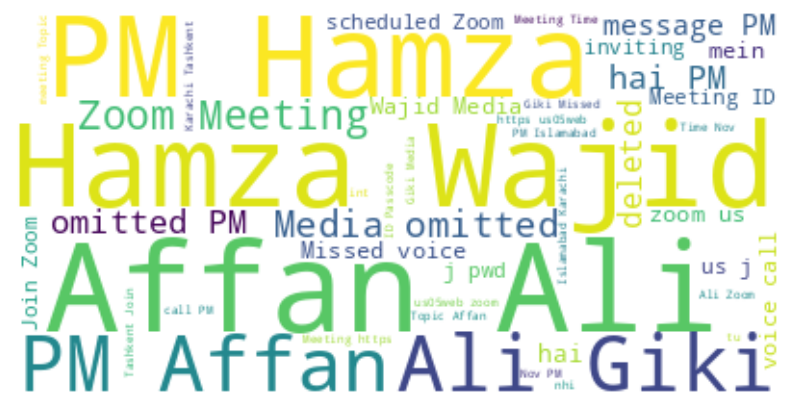

In [73]:
### Word Cloud of mostly used word in our Group
text = " ".join(review for review in df.message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
  ### Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [81]:
df.shape[0]

443

In [83]:
df=df[df['message']!='Missed voice call']

In [84]:
df.shape

(420, 10)

In [86]:
df[df['words']>100]

,date,username,message,Dates,Time,day,letters,words,Url_Count,Media_Count
3,2021-09-24 11:32:00,Hamza Wajid,"Thanks yaar 9/26/21, 2:29 PM - Affan Ali Giki:...",2021-09-24,11:32:00,Friday,1584,270,0,0
18,2021-09-28 10:10:00,Affan Ali Giki,"Room 9/28/21, 6:24 PM - Affan Ali Giki: Hamza ...",2021-09-28,10:10:00,Tuesday,1456,236,0,0
20,2021-09-29 09:29:00,Affan Ali Giki,"Yes 9/29/21, 2:02 PM - Affan Ali Giki: Common ...",2021-09-29,09:29:00,Wednesday,969,144,0,0
24,2021-10-11 07:45:00,Hamza Wajid,"Ok 10/12/21, 7:29 PM - Affan Ali Giki: . 10/12...",2021-10-11,07:45:00,Monday,2642,414,1,2
66,2022-01-01 11:32:00,Hamza Wajid,Hamza Wajid is inviting you to a scheduled Zoo...,2022-01-01,11:32:00,Saturday,2708,326,6,0
75,2022-01-13 09:05:00,Affan Ali Giki,"Missed voice call 1/13/22, 1:02 PM - Affan Ali...",2022-01-13,09:05:00,Thrusday,2323,368,0,2
76,2022-02-17 11:16:00,Affan Ali Giki,"Jani pese hai? 2/18/22, 6:41 PM - Affan Ali Gi...",2022-02-17,11:16:00,Thrusday,1384,217,0,5
90,2022-03-18 12:22:00,Affan Ali Giki,"Subah jagha di mujhey 3/20/22, 6:44 PM - Affan...",2022-03-18,12:22:00,Friday,1131,160,1,1
92,2022-04-06 03:26:00,Affan Ali Giki,"Missed voice call 4/9/22, 4:54 PM - Hamza Waji...",2022-04-06,03:26:00,Wednesday,1921,240,4,0
104,2022-04-23 11:27:00,Affan Ali Giki,Iss mein right shift or left shift operator na...,2022-04-23,11:27:00,Saturday,4974,818,0,6
